In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("data.csv")
data.head()
data['Sub-District'] = data['Sub-District'].str.upper()
data['District'] = data['District'].str.upper()
data['Region'] = data['Region'].str.upper()


data.insert(0, 'incident_id', range(1, len(data) + 1))


against_person = data.loc[data['Offence Group 4'] == 'Selected Offences Against the Person']

data.head()

,incident_id,Reported Date,Reported Hour Group,Occurred Date,Occurred Hour Group,Occurred Weekday,Place Category,Sub-District,District,Region,Victim Type,Offence Group 1,Offence Group 2,Offence Group 3,Offence Group 4,Child Flag,Domestic Flag,Alcohol Flag
0,1,20/9/2016,17:00 - 17:59,20/9/2016,17:00 - 17:59,TUE,Dwelling,BUSSELTON,SOUTH WEST,REGIONAL WA REGION,NaN,Possess Stolen Property,Possess Stolen Property,Receiving and Possession of Stolen Property,Detected Offences,N,Y,N
1,2,2/11/2015,19:00 - 19:59,31/10/2015,11:00 - 11:59,SAT,Dwelling,NORTHAM,WHEATBELT,REGIONAL WA REGION,NaN,Child Exploitation Material Offences,Recent Sexual Offences,Sexual Offences,Selected Offences Against the Person,N,N,N
2,3,11/1/2017,11:00 - 11:59,5/1/2017,07:00 - 07:59,THU,Non Dwelling,DONNYBROOK,SOUTH WEST,REGIONAL WA REGION,NaN,Child Exploitation Material Offences,Recent Sexual Offences,Sexual Offences,Selected Offences Against the Person,N,N,N
3,4,1/7/2016,12:00 - 12:59,1/7/2016,12:00 - 12:59,FRI,Other,WAGIN,GREAT SOUTHERN,REGIONAL WA REGION,NaN,Obstruct/Hinder Public Officer,Impede Public Officer,Justice Procedure Offences,Miscellaneous Offences,N,N,N
4,5,13/9/2016,21:00 - 21:59,13/9/2016,21:00 - 21:59,TUE,Other,KALGOORLIE,GOLDFIELDS-ESPERANCE,REGIONAL WA REGION,NaN,Driver's Licence Offences,Driver's Licence Offences,Transport Offences,Miscellaneous Offences,N,N,N


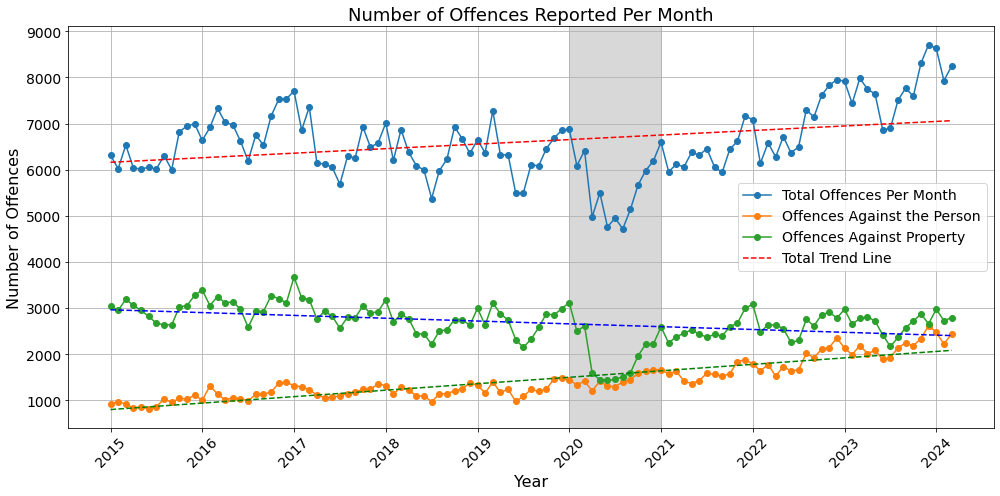

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Date formatting
data['Reported Date'] = pd.to_datetime(data['Reported Date'], format='%d/%m/%Y', errors='coerce')
data['YearMonth'] = data['Reported Date'].dt.to_period('M')

# filters
person_offences = data[data['Offence Group 4'] == 'Selected Offences Against the Person']
property_offences = data[data['Offence Group 4'] == 'Selected Offences Against Property']

total_offences_per_month = data['YearMonth'].value_counts().sort_index()
person_offences_per_month = person_offences['YearMonth'].value_counts().sort_index()
property_offences_per_month = property_offences['YearMonth'].value_counts().sort_index()

# excluding April as incomplete
total_offences_per_month = total_offences_per_month[total_offences_per_month.index < '2024-04']
person_offences_per_month = person_offences_per_month[person_offences_per_month.index < '2024-04']
property_offences_per_month = property_offences_per_month[property_offences_per_month.index < '2024-04']

# Plot code
plt.figure(figsize=(14, 7))
plt.plot(total_offences_per_month.index.astype(str), total_offences_per_month.values, marker='o', label='Total Offences Per Month')
plt.plot(person_offences_per_month.index.astype(str), person_offences_per_month.values, marker='o', label='Offences Against the Person')
plt.plot(property_offences_per_month.index.astype(str), property_offences_per_month.values, marker='o', label='Offences Against Property')
x = np.arange(len(total_offences_per_month))

# TLine for total
y_total = total_offences_per_month.values
z_total = np.polyfit(x, y_total, 1)
p_total = np.poly1d(z_total)
plt.plot(total_offences_per_month.index.astype(str), p_total(x), "r--", label='Total Trend Line')

# TLine for person
y_person = person_offences_per_month.values
z_person = np.polyfit(x, y_person, 1)
p_person = np.poly1d(z_person)
plt.plot(person_offences_per_month.index.astype(str), p_person(x), "g--")

# TLine for property
y_property = property_offences_per_month.values
z_property = np.polyfit(x, y_property, 1)
p_property = np.poly1d(z_property)
plt.plot(property_offences_per_month.index.astype(str), p_property(x), "b--")

# COVID Shade
plt.axvspan('2020-01', '2021-01', color='gray', alpha=0.3)

# X-axis yearly
years = total_offences_per_month.index.year.unique()
year_ticks = [str(year) + '-01' for year in years]
plt.xticks(year_ticks, years)
plt.title('Number of Offences Reported Per Month', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of Offences', fontsize = 16)
plt.xticks(rotation=45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.legend(fontsize = 14)
plt.tight_layout()
plt.show()


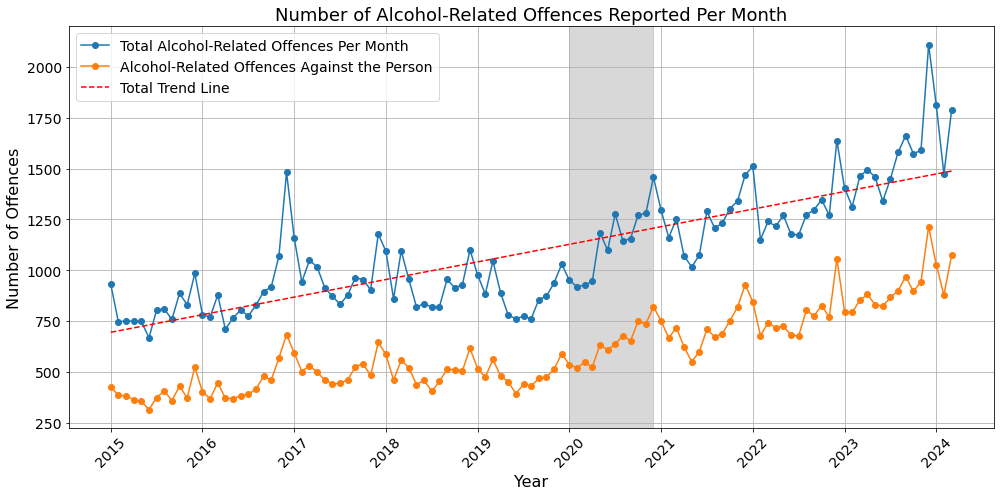

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filters
alcohol_related_data = data[data['Alcohol Flag'] == 'Y']
person_offences = alcohol_related_data[alcohol_related_data['Offence Group 4'] == 'Selected Offences Against the Person']
property_offences = alcohol_related_data[alcohol_related_data['Offence Group 4'] == 'Selected Offences Against Property']

# Counts
total_offences_per_month = alcohol_related_data['YearMonth'].value_counts().sort_index()
person_offences_per_month = person_offences['YearMonth'].value_counts().sort_index()
property_offences_per_month = property_offences['YearMonth'].value_counts().sort_index()

# remove April again
total_offences_per_month = total_offences_per_month[total_offences_per_month.index < '2024-04']
person_offences_per_month = person_offences_per_month[person_offences_per_month.index < '2024-04']
property_offences_per_month = property_offences_per_month[property_offences_per_month.index < '2024-04']

# Plots
plt.figure(figsize=(14, 7))
plt.plot(total_offences_per_month.index.astype(str), total_offences_per_month.values, marker='o', label='Total Alcohol-Related Offences Per Month')
plt.plot(person_offences_per_month.index.astype(str), person_offences_per_month.values, marker='o', label='Alcohol-Related Offences Against the Person')
x = np.arange(len(total_offences_per_month))
y_total = total_offences_per_month.values
z_total = np.polyfit(x, y_total, 1)  # Linear fit
p_total = np.poly1d(z_total)
plt.plot(total_offences_per_month.index.astype(str), p_total(x), "r--", label='Total Trend Line')

# COVID shade
plt.axvspan('2020-01', '2020-12', color='gray', alpha=0.3)
years = total_offences_per_month.index.year.unique()
year_ticks = [str(year) + '-01' for year in years]
plt.xticks(year_ticks, years)  # Set custom ticks
plt.title('Number of Alcohol-Related Offences Reported Per Month', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Offences', fontsize=16)

plt.xticks(rotation=45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.legend(fontsize=14)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


75.44993419204093 55.56762976220916


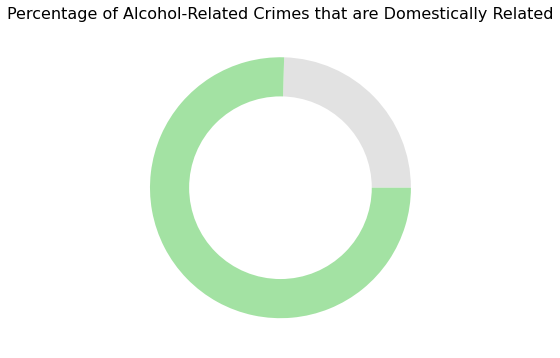

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'updated_data.csv'
data = pd.read_csv(file_path)

# Filters
selected_offences = data[data['Offence Group 4'] == 'Selected Offences Against the Person']
alcohol_yes = selected_offences[selected_offences['Alcohol Flag'] == 'Y']
alcohol_no = selected_offences[selected_offences['Alcohol Flag'] == 'N']

domestic_proportion_alcohol_yes = alcohol_yes['Domestic Flag'].value_counts(normalize=True).get('Y', 0) * 100
domestic_proportion_alcohol_no = alcohol_no['Domestic Flag'].value_counts(normalize=True).get('Y', 0) * 100

alc_dom = alcohol_yes[alcohol_yes['Domestic Flag'] == 'Y']
alc_dom_ass = alc_dom[alc_dom['Offence Group 3'] == 'Assault']


# Proportions
print(domestic_proportion_alcohol_yes, domestic_proportion_alcohol_no, 
 )

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [100 - domestic_proportion_alcohol_yes, domestic_proportion_alcohol_yes]
labels = ['Domestic', 'Non-Domestic']
colors = ['#e2e2e2','#a3e2a3']
wedges, texts = ax.pie(data, colors=colors, wedgeprops=dict(width=1.5))
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)
plt.title('Percentage of Alcohol-Related Crimes that are Domestically Related', fontsize=16)
plt.show()


75.44993419204093 55.56762976220916


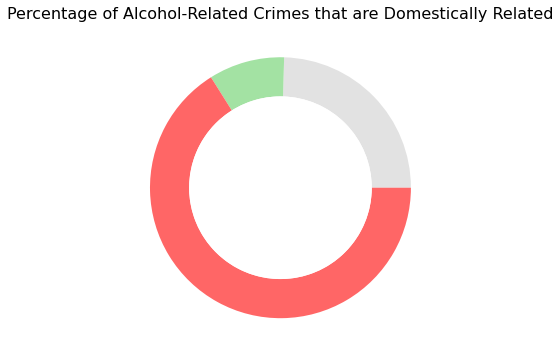

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# assault proportion
assault_proportion_domestic_alcohol_yes = alc_dom_ass.shape[0]/ alc_dom.shape[0] * 100

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
non_domestic_proportion = 100 - domestic_proportion_alcohol_yes
domestic_non_assault_proportion = domestic_proportion_alcohol_yes * (1 - assault_proportion_domestic_alcohol_yes / 100)
domestic_assault_proportion = domestic_proportion_alcohol_yes * (assault_proportion_domestic_alcohol_yes / 100)
data = [non_domestic_proportion, domestic_non_assault_proportion, domestic_assault_proportion]
labels = ['Non-Domestic', 'Domestic Non-Assault', 'Domestic Assault']
colors = ['#e2e2e2', '#a3e2a3', '#ff6666']=
wedges, texts = ax.pie(data, colors=colors, wedgeprops=dict(width=0.3))
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)
plt.title('Percentage of Alcohol-Related Crimes that are Domestically Related', fontsize=16)

plt.show()


/var/folders/jq/s2flyjhs5mb2m52b15s2cb_h0000gn/T/ipykernel_17439/3256124344.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_offences['YearMonth'] = selected_offences['Reported Date'].dt.to_period('M')
/var/folders/jq/s2flyjhs5mb2m52b15s2cb_h0000gn/T/ipykernel_17439/3256124344.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_offences['Year'] = selected_offences['Reported Date'].dt.year
/var/folders/jq/s2flyjhs5mb2m52b15s2cb_h0000gn/T/ipykernel_17439/3256124344.py:16: SettingWithCop

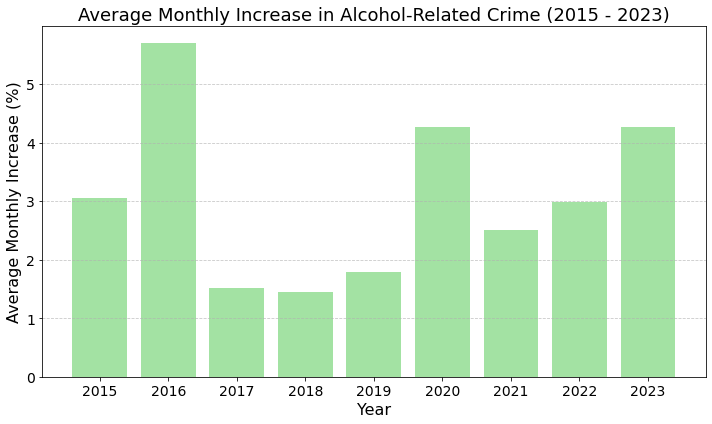

(41.83277037476956, 75.44993419204093, 87.55390043120345)

In [106]:
#ALCOHOL CRIME BARCHART
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'updated_data.csv'
data = pd.read_csv(file_path)
data['Reported Date'] = pd.to_datetime(data['Reported Date'], format='%d/%m/%Y', errors='coerce')

# Filter for Offence Group 4 = 'Selected Offences Against the Person'
selected_offences = data[data['Offence Group 4'] == 'Selected Offences Against the Person']

# Extract month and year for grouping
selected_offences['YearMonth'] = selected_offences['Reported Date'].dt.to_period('M')
selected_offences['Year'] = selected_offences['Reported Date'].dt.year
selected_offences['Month'] = selected_offences['Reported Date'].dt.month

alcohol_related_data = selected_offences[selected_offences['Alcohol Flag'] == 'Y']
monthly_counts = alcohol_related_data.groupby(['Year', 'Month']).size().reset_index(name='Count')

monthly_counts['Previous Count'] = monthly_counts.groupby('Year')['Count'].shift(1)
monthly_counts['Percentage Increase'] = (monthly_counts['Count'] - monthly_counts['Previous Count']) / monthly_counts['Previous Count'] * 100

average_monthly_percentage_increase = monthly_counts.groupby('Year')['Percentage Increase'].mean().reset_index(name='Average Monthly Percentage Increase')

average_monthly_percentage_increase = average_monthly_percentage_increase.dropna()

average_monthly_percentage_increase = average_monthly_percentage_increase[(average_monthly_percentage_increase['Year'] >= 2015) & (average_monthly_percentage_increase['Year'] < 2024)]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(average_monthly_percentage_increase['Year'].astype(str), average_monthly_percentage_increase['Average Monthly Percentage Increase'], color='#a3e2a3')
plt.title('Average Monthly Increase in Alcohol-Related Crime (2015 - 2023)', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Monthly Increase (%)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# percentages
total_selected_offences = len(selected_offences)
alcohol_related = selected_offences[selected_offences['Alcohol Flag'] == 'Y']
percent_alcohol_related = (len(alcohol_related) / total_selected_offences) * 100

# From alcohol related, calculate the percentage that are domestically related
domestically_related = alcohol_related[alcohol_related['Domestic Flag'] == 'Y']
percent_domestically_related = (len(domestically_related) / len(alcohol_related)) * 100

# From domestically related, calculate the percentage that are 'Assault'
assault_related = domestically_related[domestically_related['Offence Group 3'] == 'Assault']
percent_assault_related = (len(assault_related) / len(domestically_related)) * 100

percent_alcohol_related, percent_domestically_related, percent_assault_related


/var/folders/jq/s2flyjhs5mb2m52b15s2cb_h0000gn/T/ipykernel_17439/3335146859.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_offences['YearMonth'] = selected_offences['Reported Date'].dt.to_period('M')
/var/folders/jq/s2flyjhs5mb2m52b15s2cb_h0000gn/T/ipykernel_17439/3335146859.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_offences['Year'] = selected_offences['Reported Date'].dt.year
/var/folders/jq/s2flyjhs5mb2m52b15s2cb_h0000gn/T/ipykernel_17439/3335146859.py:17: SettingWithCop

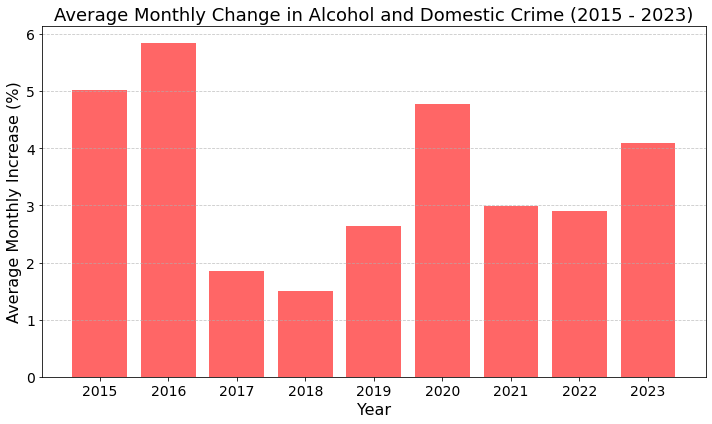

In [86]:
#ALCOHOL AND DOMESTIC CRIME BARCHART

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'updated_data.csv'
data = pd.read_csv(file_path)
data['Reported Date'] = pd.to_datetime(data['Reported Date'], format='%d/%m/%Y', errors='coerce')

selected_offences = data[data['Offence Group 4'] == 'Selected Offences Against the Person']
selected_offences['YearMonth'] = selected_offences['Reported Date'].dt.to_period('M')
selected_offences['Year'] = selected_offences['Reported Date'].dt.year
selected_offences['Month'] = selected_offences['Reported Date'].dt.month

alcohol_domestic_related_data = selected_offences[
    (selected_offences['Alcohol Flag'] == 'Y') & (selected_offences['Domestic Flag'] == 'Y')
]
monthly_counts = alcohol_domestic_related_data.groupby(['Year', 'Month']).size().reset_index(name='Count')
monthly_counts['Previous Count'] = monthly_counts.groupby('Year')['Count'].shift(1)
monthly_counts['Percentage Increase'] = (monthly_counts['Count'] - monthly_counts['Previous Count']) / monthly_counts['Previous Count'] * 100
average_monthly_percentage_increase = monthly_counts.groupby('Year')['Percentage Increase'].mean().reset_index(name='Average Monthly Percentage Increase')
average_monthly_percentage_increase = average_monthly_percentage_increase.dropna()
average_monthly_percentage_increase = average_monthly_percentage_increase[(average_monthly_percentage_increase['Year'] >= 2015) & (average_monthly_percentage_increase['Year'] < 2024)]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(average_monthly_percentage_increase['Year'].astype(str), average_monthly_percentage_increase['Average Monthly Percentage Increase'], color='#ff6666')
plt.title('Average Monthly Change in Alcohol and Domestic Crime (2015 - 2023)', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Monthly Increase (%)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

